# Linear Regressions in Python

## Introduction

Linear regressions are one of the first machine learning algortithms that data scientists interact with. It is a very useful and powerful technique that can be used to predict the profitability of a certain data set. It can also help you understand customer behavior in a data set.

## 1. What is a Linear Regression?

The goal of making a linear regression is to find a relationship between one or more features (the independent variables) and a continuous target variable (the dependent variable). They typically look like this (the values on the x and y axes can be changed):
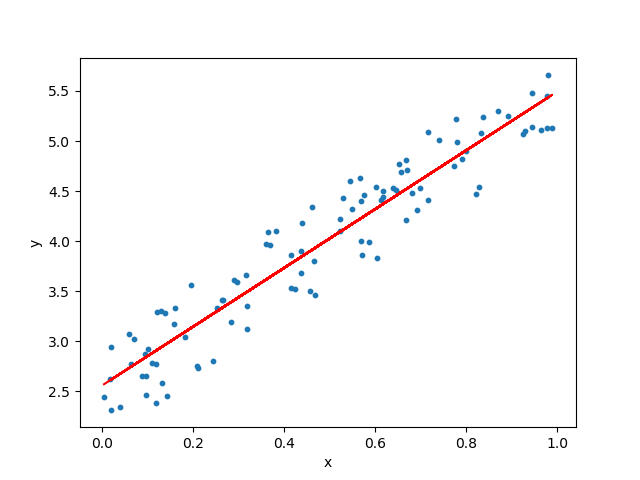

### 1a. Hypothesis of a Linear Regression

The linear regression model (or line of best fit) can be represented by the following equation:




Where:

1. Y is the predicted value
2. θ₀ is the bias term.
3. θ₁,…,θₙ are the model parameters
4. x₁, x₂,…,xₙ are the feature values.

OR:

The above hypothesis can also be represented by:




Where:

1. θ is the model’s parameter vector including the bias term θ₀
2. x is the feature vector with x₀ =1

### 1b. The Line of Best Fit

The line of best fit, or the regression line, in a linear regression is the line that is the average, or "middle", line that takes into account all the data provided (except the outliers), and it matches up best with the data in the set.

They typically look like this (the yellow line is the line of best fit):
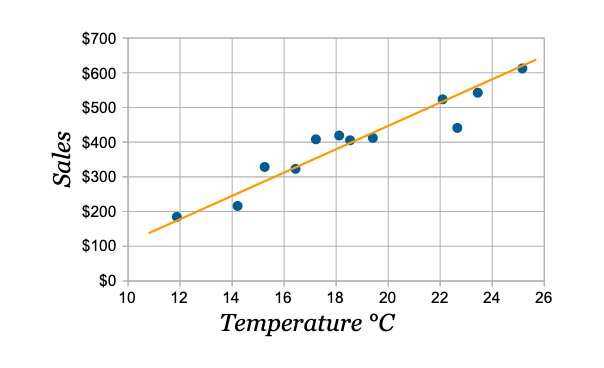

This line can help us predict future values and trends, which is a very, very useful thing in data science.

### 1c. Residuals

The distance, or error, between the predicted values and the observed values in a linear regression are called residuals. The residuals can be visualized by the vertical lines from the observed data value to the regression line, as shown:

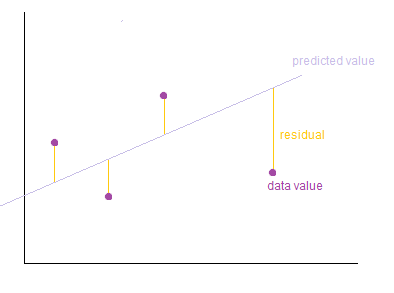

To define and measure the error of our model, we define the cost function as the sum of the squares of the residuals. The cost function is denoted by:

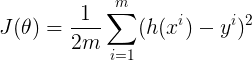

### 1d. Gradient Descent

Now, to minimize the cost function, we use gradient descent. It iteratively tweaks the parameters of the model in order to minimize the cost function, which pretty much helps you find the line of best fit better.

The steps for gradient descent:

1. We first initialize the model parameters with some random values. This is called *random initialization*.
2. Now we need to measure how the cost function changes with change in its parameters. Therefore we compute the partial derivatives of the cost function w.r.t to the parameters θ₀, θ₁, … , θₙ, as so: 
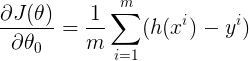
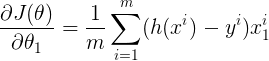


# Finish!!!

### 1e. The Correlation Coefficient

To evaluate the performance of the model, we use the Coefficient of Determination, R², and also the root mean squared error (RMSE).

1. The R² score, or the coefficient of determination/correlation coefficient, explains how much the total variance of the dependent variable can be reduced by using the least square regression. Note that -1<R<1, with -1 and 1 values for R being *perfect* fits, and as R moves closer to 0 it becomes more sparse.

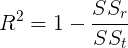

Where SSₜ is the total sum of errors if we take the mean of the observed values as the predicted value:

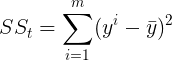

And SSᵣ is the sum of the square of residuals:

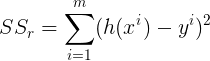

Or, in code:

In [ ]:
# sum of square of residuals
ssr = np.sum((y_pred - y_actual)**2)

#  total sum of squares
sst = np.sum((y_actual - np.mean(y_actual))**2)

# R2 score
r2_score = 1 - (ssr/sst)

2. RMSE is the square root of the average of the sum of the squares of residuals, as shown below:

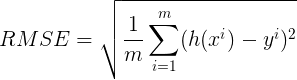

Or, in code:

In [ ]:
# mean squared error
mse = np.sum((y_pred - y_actual)**2)

# root mean squared error
# m is the number of training examples
import numpy as np
rmse = np.sqrt(mse/m)

NOTE: If R²=k, then we reduced the prediction error by k% by using regression.

## 2. Real Life Example:

We'll be using the Housing data set (which contains information about houses in Boston) for this subject on linear regressions

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline
from sklearn.datasets import load_boston
boston_dataset = load_boston() # boston_dataset is a dictionary
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Above, the keys are as follows:

data: contains the information for various houses

target: prices of the house

feature_names: names of the features

DESCR: describes the dataset

More features can be found by:

In [11]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

NOTE: the median prices of the homes indicated by the variable MEDV is our *target variable* and the remaining are the *feature variables* based on which we will predict the value of a house.

Now, we will load the data:

In [12]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
